### Reference

https://www.geeksforgeeks.org/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/

https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb

https://medium.com/analytics-vidhya/clustering-on-iris-dataset-in-python-using-k-means-4735b181affe

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [ ]:
iris = load_iris()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data visualization

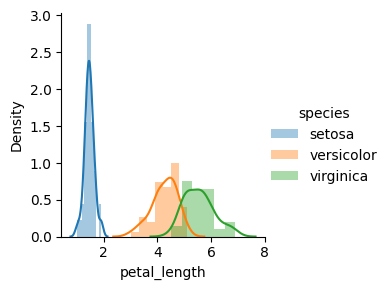

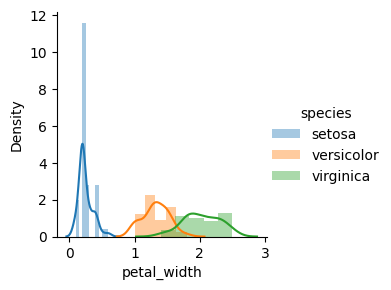

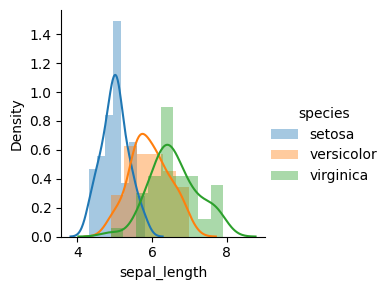

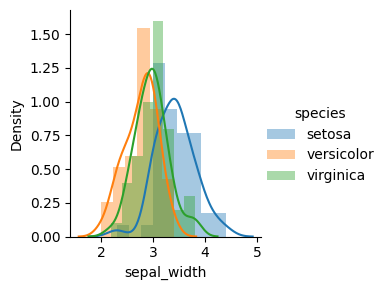

In [ ]:
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"]

sns.FacetGrid(iris, hue="species").map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris, hue="species").map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris, hue="species").map(sns.distplot, "sepal_length").add_legend()
sns.FacetGrid(iris, hue="species").map(sns.distplot, "sepal_width").add_legend()
plt.show()

In [ ]:
#Prepare dataset
X = iris.iloc[:, :-2]

### K Means Clustering Algorithm

### Elbow plot

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

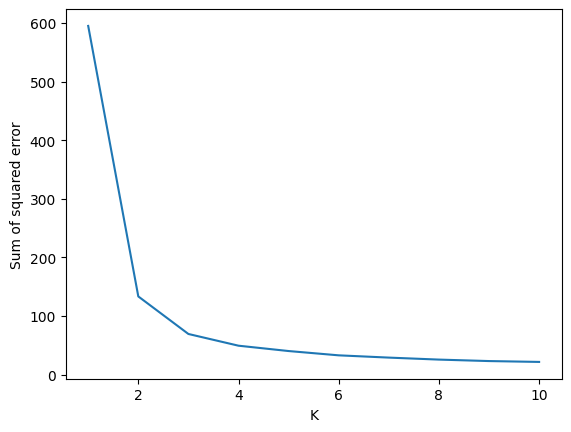

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,11),wcss)

### K = 3

In [ ]:
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X)

### Visualizing the clusters

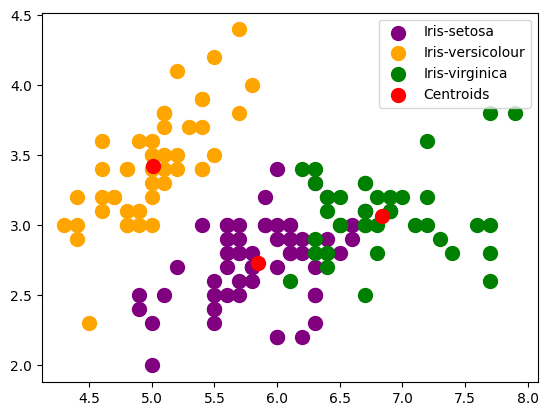

In [ ]:
# Visualising the clusters
cols = iris.columns
plt.scatter(X.loc[y_kmeans == 0, cols[0]],
            X.loc[y_kmeans == 0, cols[1]],
            s=100, c='purple',
            label='Iris-setosa')
plt.scatter(X.loc[y_kmeans == 1, cols[0]],
            X.loc[y_kmeans == 1, cols[1]],
            s=100, c='orange',
            label='Iris-versicolour')
plt.scatter(X.loc[y_kmeans == 2, cols[0]],
            X.loc[y_kmeans == 2, cols[1]],
            s=100, c='green',
            label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=100, c='red',
            label='Centroids')

plt.legend()

# MNIST Dataset

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
RANDOM_STATE = 42

In [ ]:
digit_dataset = load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
X = digit_dataset.data
y = digit_dataset.target

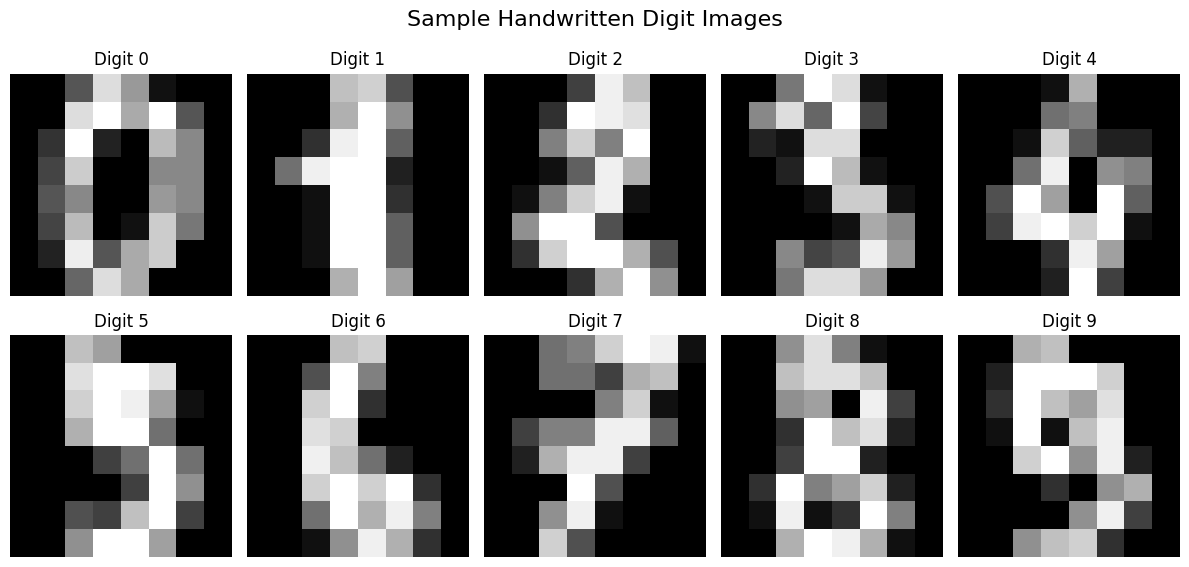

แต่ละรูปเป็น 8x8 pixels (รวม 64 features)
มีทั้งหมด 10 digits (0-9)


In [ ]:
# แสดงตัวอย่าง digit images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample Handwritten Digit Images', fontsize=16)

for i in range(10):
    # หา index ของแต่ละ digit
    digit_indices = np.where(y == i)[0]
    sample_idx = digit_indices[0]  # เอาตัวอย่างแรก

    # แปลง 64 features เป็น 8x8 image
    sample_image = X[sample_idx].reshape(8, 8)

    row = i // 5
    col = i % 5
    axes[row, col].imshow(sample_image, cmap='gray')
    axes[row, col].set_title(f'Digit {i}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("แต่ละรูปเป็น 8x8 pixels (รวม 64 features)")
print("มีทั้งหมด 10 digits (0-9)")

In [ ]:
pca = PCA(n_components=2, random_state = RANDOM_STATE)
X_pca = pca.fit_transform(X)

print("=== PCA Transformation ===")
print(f"Original data: {X.shape[0]} samples, {X.shape[1]} features")
print(f"After PCA: {X_pca.shape[0]} samples, {X_pca.shape[1]} features")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.3f}")

# ใช้ข้อมูล PCA สำหรับ clustering
X = X_pca

=== PCA Transformation ===
Original data: 1797 samples, 64 features
After PCA: 1797 samples, 2 features
Explained variance ratio: [0.14890594 0.13618771]
Total variance explained: 0.285


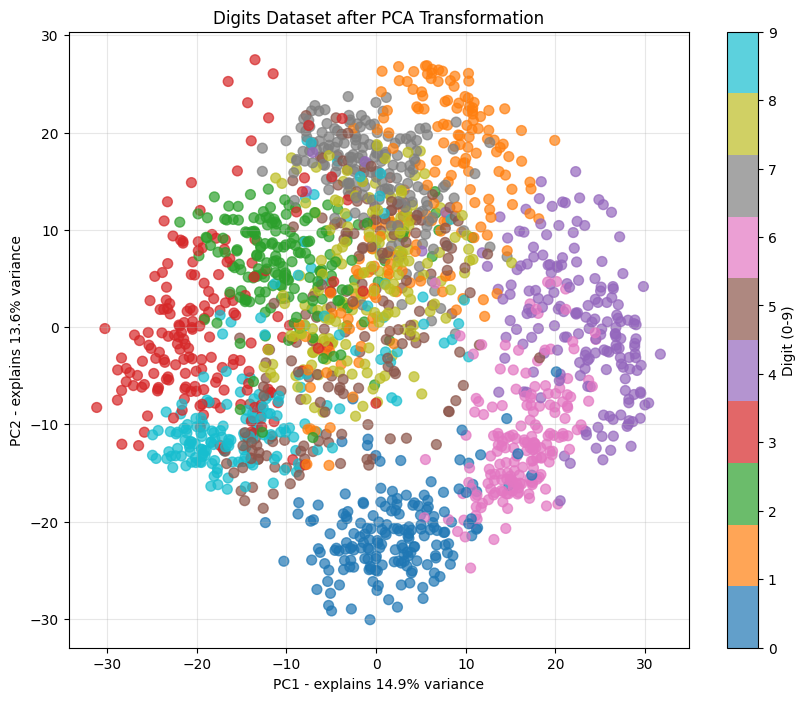

นี่คือการแสดงผล digits dataset หลังจาก PCA transformation


In [ ]:
# แสดงผล PCA transformation
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7, s=50)
plt.colorbar(scatter, label='Digit (0-9)')
plt.xlabel(f'PC1 - explains {pca.explained_variance_ratio_[0]:.1%} variance')
plt.ylabel(f'PC2 - explains {pca.explained_variance_ratio_[1]:.1%} variance')
plt.title('Digits Dataset after PCA Transformation')
plt.grid(True, alpha=0.3)
plt.show()

print("นี่คือการแสดงผล digits dataset หลังจาก PCA transformation")

In [ ]:
!pip install kneed


    K           WCSS        Δ(WCSS)
0   1  615533.519855       0.000000
1   2  376198.250293  239335.269562
2   3  217450.949510  158747.300784
3   4  153979.797831   63471.151679
4   5  121345.760731   32634.037100
5   6  101686.224312   19659.536419
6   7   84229.342288   17456.882025
7   8   72280.428043   11948.914245
8   9   63431.179678    8849.248365
9  10   56255.966857    7175.212821

📍 Elbow point detected at K = 4


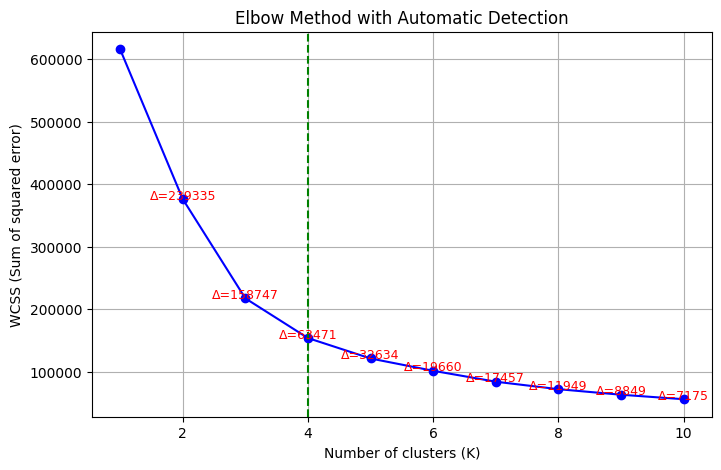

In [ ]:
# ✅ ใช้ได้บน Google Colab ทันที

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
from kneed import KneeLocator   # 👈 ใช้สำหรับหา elbow

# สร้างข้อมูลจำลอง
# X, _ = make_blobs(X, centers=4, cluster_std=1.0, random_state=42) # Removed this line

# เก็บค่า WCSS (inertia)
wcss = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=RANDOM_STATE
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# คำนวณการเปลี่ยนแปลง WCSS ระหว่างแต่ละ K
diff = [0] + [wcss[i-1] - wcss[i] for i in range(1, len(wcss))]

# ใช้ KneeLocator หา elbow point
kl = KneeLocator(K_values, wcss, curve="convex", direction="decreasing")
elbow_k = kl.elbow

# แสดงผลในตาราง
df = pd.DataFrame({
    'K': K_values,
    'WCSS': wcss,
    'Δ(WCSS)': diff
})
print(df)
print(f"\n📍 Elbow point detected at K = {elbow_k}")

# วาดกราฟ
plt.figure(figsize=(8,5))
plt.plot(K_values, wcss, marker='o', color='b', linestyle='-')
plt.title('Elbow Method with Automatic Detection')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Sum of squared error)')
plt.grid(True)

# ใส่ค่า Δ(WCSS) บนจุด
for i in range(1, len(K_values)):
    plt.text(K_values[i], wcss[i] + 50, f"Δ={diff[i]:.0f}", ha='center', fontsize=9, color='red')

# ใส่เส้นแนวตั้งที่จุด Elbow
if elbow_k is not None:
    plt.axvline(x=elbow_k, color='green', linestyle='--', linewidth=1.5)
    # plt.text(elbow_k + 0.1, min(wcss) + 200, f'Elbow at K={elbow_k}', color='green', fontsize=10)

plt.show()

## K = 3

In [ ]:
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X)

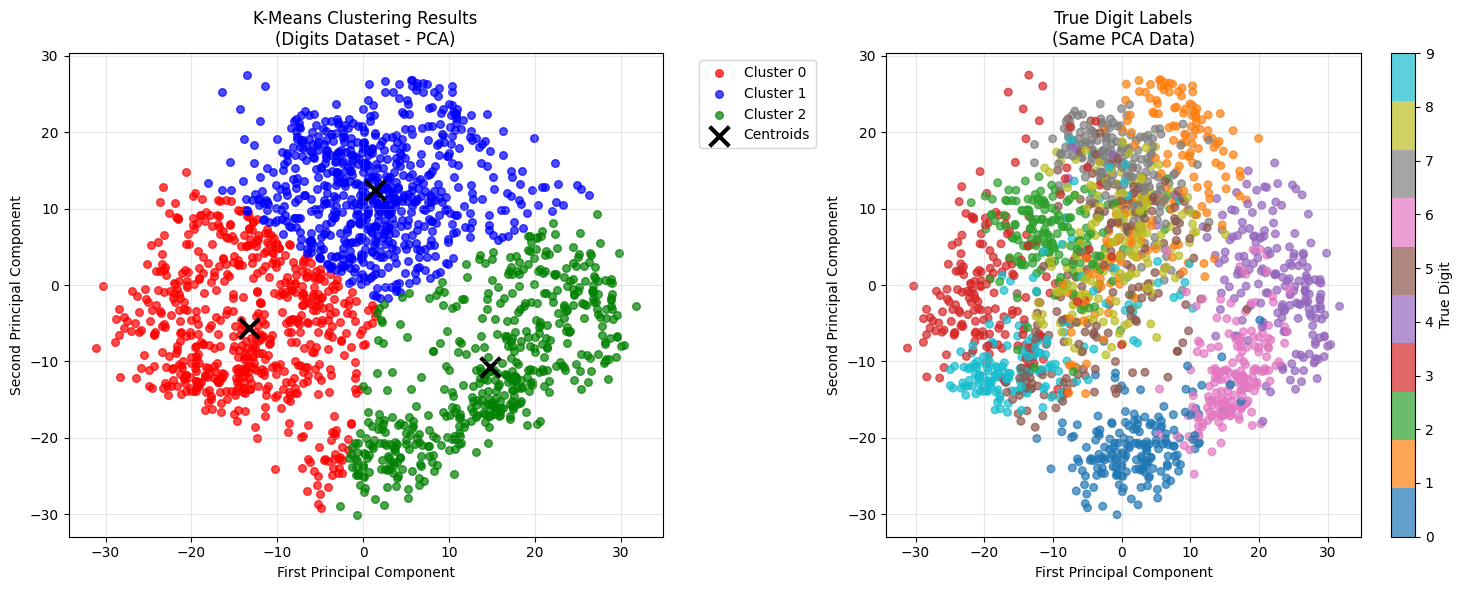


=== Clustering Evaluation (K=3 on MNIST PCA) ===
Adjusted Rand Index: 0.1972
Silhouette Score: 0.4238


In [ ]:
# Visualizing clustering results
plt.figure(figsize=(15, 6))

# Plot 1: K-means clustering results
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green', 'purple', 'orange',
          'brown', 'pink', 'gray', 'olive', 'cyan']

# Perform K-Means on the PCA-transformed MNIST data
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X_pca) # Use X_pca here

for i in range(3): # Iterate up to the number of clusters (3)
    mask = y_kmeans == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], # Use X_pca here
                c=colors[i], label=f'Cluster {i}',
                alpha=0.7, s=30)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='black', marker='x', s=200,
            linewidths=3, label='Centroids')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering Results\n(Digits Dataset - PCA)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: True digit labels (using actual MNIST labels)
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], # Use X_pca here
                     c=digit_dataset.target, cmap='tab10', # Use actual MNIST labels
                     alpha=0.7, s=30)
plt.colorbar(scatter, label='True Digit')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('True Digit Labels\n(Same PCA Data)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluation
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Evaluate against the actual MNIST labels
ari = adjusted_rand_score(digit_dataset.target, y_kmeans)
sil = silhouette_score(X_pca, y_kmeans)

print("\n=== Clustering Evaluation (K=3 on MNIST PCA) ===")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Silhouette Score: {sil:.4f}")

## K = 4

In [ ]:
kmeans = KMeans(n_clusters=4,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X)

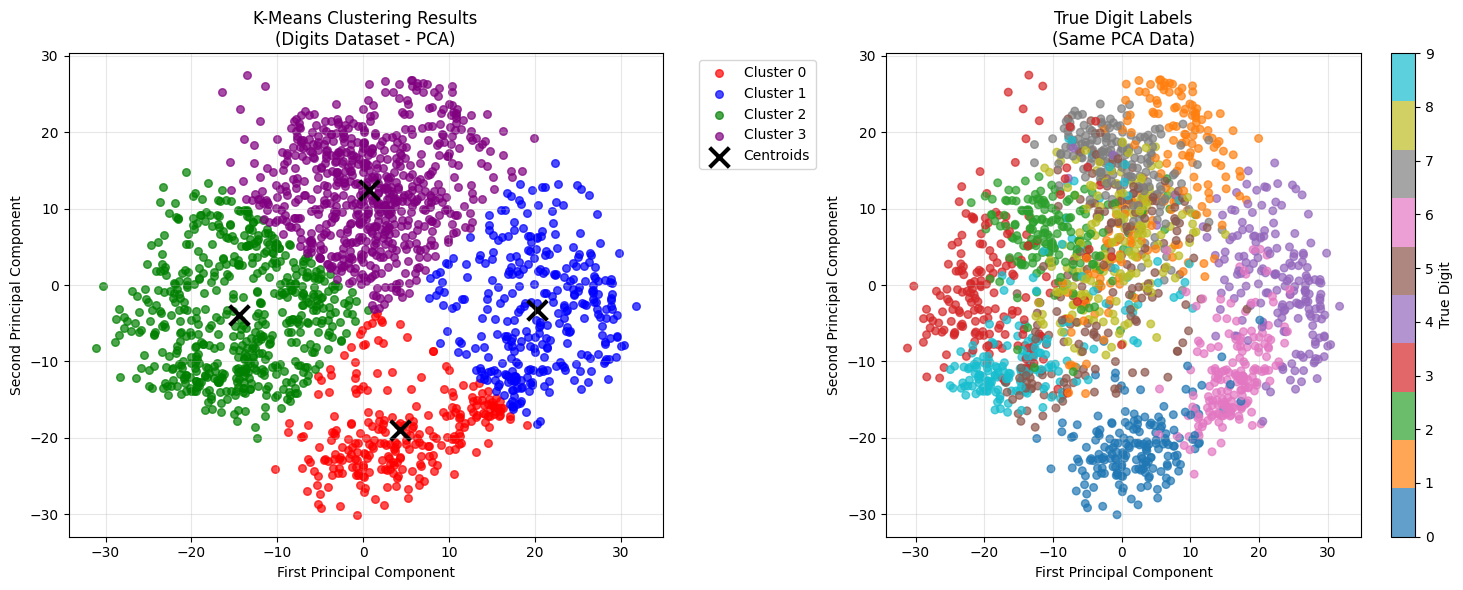


=== Clustering Evaluation (K=4 on MNIST PCA) ===
Adjusted Rand Index: 0.2567
Silhouette Score: 0.4259


In [ ]:
# Visualizing clustering results
plt.figure(figsize=(15, 6))

# Plot 1: K-means clustering results
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green', 'purple', 'orange',
          'brown', 'pink', 'gray', 'olive', 'cyan']

# Perform K-Means on the PCA-transformed MNIST data
kmeans = KMeans(n_clusters=4, # Set n_clusters to 4
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=42)
y_kmeans = kmeans.fit_predict(X_pca) # Use X_pca here

for i in range(4): # Iterate up to the number of clusters (4)
    mask = y_kmeans == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], # Use X_pca here
                c=colors[i % len(colors)], label=f'Cluster {i}', # Use modulo for colors
                alpha=0.7, s=30)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='black', marker='x', s=200,
            linewidths=3, label='Centroids')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering Results\n(Digits Dataset - PCA)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: True digit labels (using actual MNIST labels)
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], # Use X_pca here
                     c=digit_dataset.target, cmap='tab10', # Use actual MNIST labels
                     alpha=0.7, s=30)
plt.colorbar(scatter, label='True Digit')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('True Digit Labels\n(Same PCA Data)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluation
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Evaluate against the actual MNIST labels
ari = adjusted_rand_score(digit_dataset.target, y_kmeans)
sil = silhouette_score(X_pca, y_kmeans)

print("\n=== Clustering Evaluation (K=4 on MNIST PCA) ===") # Updated print statement
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Silhouette Score: {sil:.4f}")

##   K = 10

In [ ]:
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X)

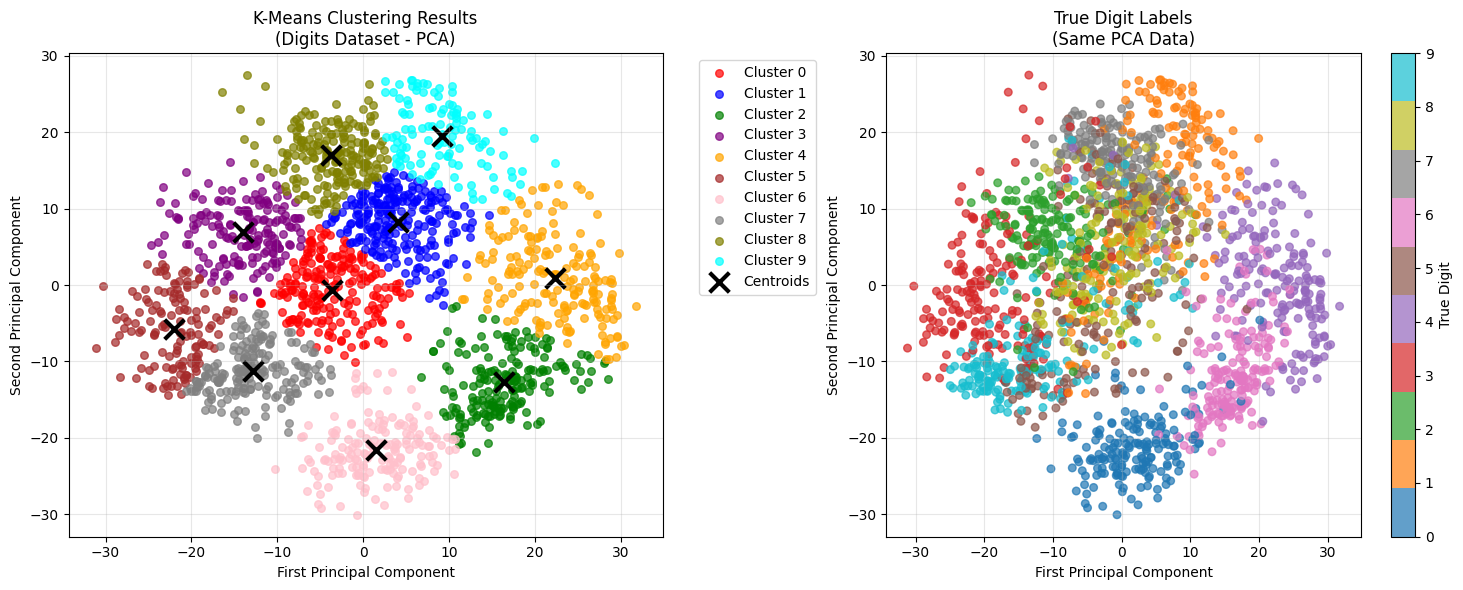


=== Clustering Evaluation (K=10 on MNIST PCA) ===
Adjusted Rand Index: 0.3927
Silhouette Score: 0.3937


In [ ]:
# Visualizing clustering results
plt.figure(figsize=(15, 6))

# Plot 1: K-means clustering results
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green', 'purple', 'orange',
          'brown', 'pink', 'gray', 'olive', 'cyan']

# Perform K-Means on the PCA-transformed MNIST data with K=10
kmeans = KMeans(n_clusters=10, # Set n_clusters to 10
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X_pca) # Use X_pca here

for i in range(10): # Iterate up to the number of clusters (10)
    mask = y_kmeans == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], # Use X_pca here
                c=colors[i % len(colors)], label=f'Cluster {i}', # Use modulo for colors
                alpha=0.7, s=30)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='black', marker='x', s=200,
            linewidths=3, label='Centroids')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering Results\n(Digits Dataset - PCA)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: True digit labels (using actual MNIST labels)
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], # Use X_pca here
                     c=digit_dataset.target, cmap='tab10', # Use actual MNIST labels
                     alpha=0.7, s=30)
plt.colorbar(scatter, label='True Digit')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('True Digit Labels\n(Same PCA Data)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluation
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Evaluate against the actual MNIST labels
ari = adjusted_rand_score(digit_dataset.target, y_kmeans)
sil = silhouette_score(X_pca, y_kmeans)

print("\n=== Clustering Evaluation (K=10 on MNIST PCA) ===")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Silhouette Score: {sil:.4f}")

## Modified Parameter

     K       init  max_iter       ARI  Silhouette
0    3  k-means++       300  0.197222    0.423792
1    3  k-means++       500  0.197222    0.423792
2    3     random       300  0.200971    0.424264
3    3     random       500  0.200971    0.424264
4    4  k-means++       300  0.256690    0.425895
5    4  k-means++       500  0.256690    0.425895
6    4     random       300  0.256690    0.425895
7    4     random       500  0.256690    0.425895
8   10  k-means++       300  0.392682    0.393748
9   10  k-means++       500  0.392682    0.393748
10  10     random       300  0.389704    0.392587
11  10     random       500  0.389704    0.392587


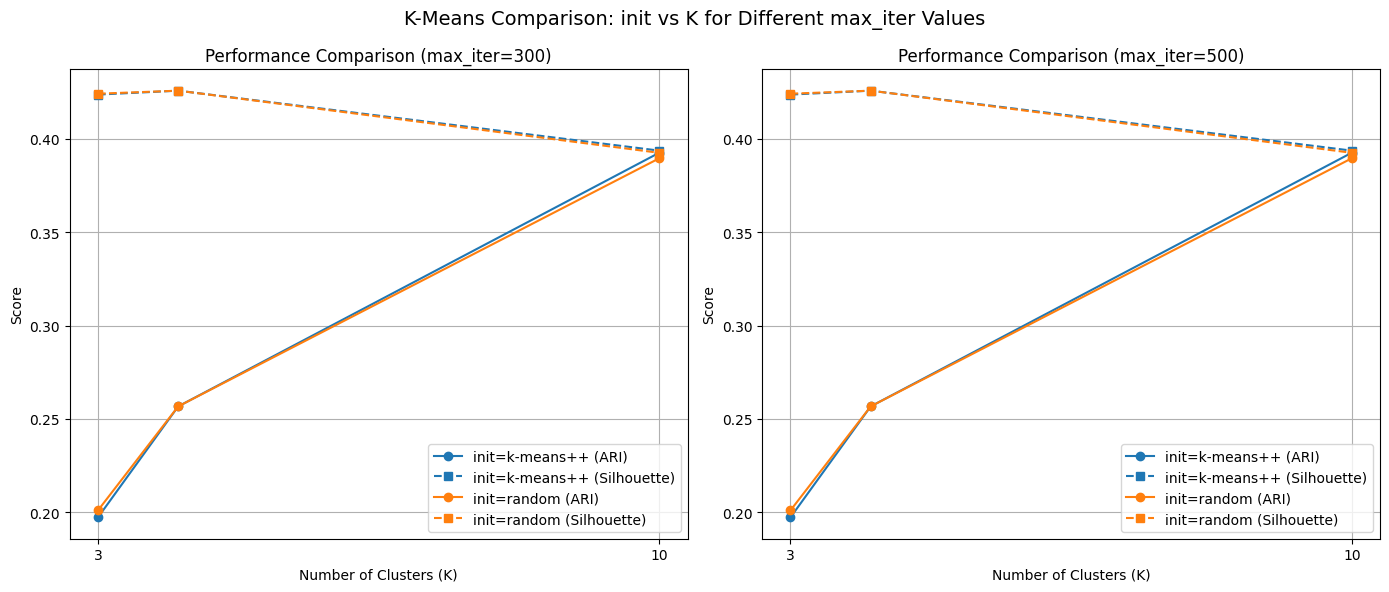

In [ ]:
inits = ['k-means++', 'random']
max_iters = [300, 500]
n_clusters_list = [3,4 ,10]

# ----------------------------
# 3️⃣ วนลูปทดสอบทุก combination
# ----------------------------
results = []

for n_clusters in n_clusters_list:
    for init_method in inits:
        for max_iter in max_iters:
            kmeans = KMeans(
                n_clusters=n_clusters,
                init=init_method,
                max_iter=max_iter,
                n_init=10,
                random_state=0
            )
            labels = kmeans.fit_predict(X_pca)

            ari = adjusted_rand_score(y, labels)
            sil = silhouette_score(X_pca, labels)

            results.append({
                'K': n_clusters,
                'init': init_method,
                'max_iter': max_iter,
                'ARI': ari,
                'Silhouette': sil
            })

df_results = pd.DataFrame(results)
print(df_results)

# ----------------------------
# 4️⃣ วาดกราฟแยกตามค่า max_iter
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = {'k-means++': 'tab:blue', 'random': 'tab:orange'}

for i, max_iter in enumerate(max_iters):
    subset = df_results[df_results['max_iter'] == max_iter]

    for init_method in inits:
        data = subset[subset['init'] == init_method]
        axes[i].plot(data['K'], data['ARI'], marker='o',
                     color=colors[init_method],
                     linestyle='-', label=f"init={init_method} (ARI)")
        axes[i].plot(data['K'], data['Silhouette'], marker='s',
                     color=colors[init_method],
                     linestyle='--', label=f"init={init_method} (Silhouette)")

    axes[i].set_title(f"Performance Comparison (max_iter={max_iter})")
    axes[i].set_xlabel("Number of Clusters (K)")
    axes[i].set_ylabel("Score")
    axes[i].set_xticks([3, 10])
    axes[i].grid(True)
    axes[i].legend()

plt.suptitle("K-Means Comparison: init vs K for Different max_iter Values", fontsize=14)
plt.tight_layout()
plt.show()

     K       init  max_iter       ARI  Silhouette
0    3  k-means++       300  0.197222    0.423792
1    3  k-means++       500  0.197222    0.423792
2    3     random       300  0.200971    0.424264
3    3     random       500  0.200971    0.424264
4    4  k-means++       300  0.256690    0.425895
5    4  k-means++       500  0.256690    0.425895
6    4     random       300  0.256690    0.425895
7    4     random       500  0.256690    0.425895
8   10  k-means++       300  0.392682    0.393748
9   10  k-means++       500  0.392682    0.393748
10  10     random       300  0.389704    0.392587
11  10     random       500  0.389704    0.392587


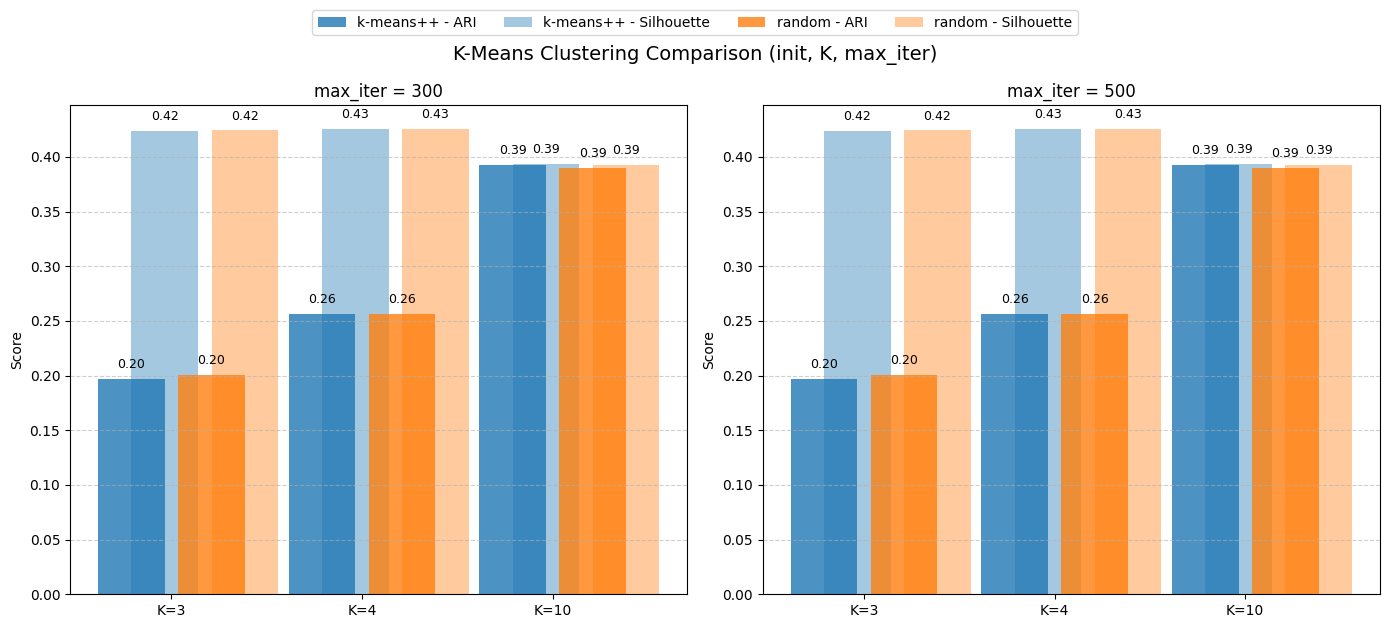

In [ ]:
inits = ['k-means++', 'random']
max_iters = [300, 500]
n_clusters_list = [3,4, 10]

# ----------------------------
# 3️⃣ วนลูปทดสอบทุก combination
# ----------------------------
results = []

for n_clusters in n_clusters_list:
    for init_method in inits:
        for max_iter in max_iters:
            kmeans = KMeans(
                n_clusters=n_clusters,
                init=init_method,
                max_iter=max_iter,
                n_init=10,
                random_state=0
            )
            labels = kmeans.fit_predict(X_pca)

            ari = adjusted_rand_score(y, labels)
            sil = silhouette_score(X_pca, labels)

            results.append({
                'K': n_clusters,
                'init': init_method,
                'max_iter': max_iter,
                'ARI': ari,
                'Silhouette': sil
            })

df_results = pd.DataFrame(results)
print(df_results)

# ----------------------------
# 4️⃣ วาดกราฟ Bar plot แยกตาม max_iter
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
bar_width = 0.35
colors = {'k-means++': '#1f77b4', 'random': '#ff7f0e'}

for i, max_iter in enumerate(max_iters):
    subset = df_results[df_results['max_iter'] == max_iter]
    x = np.arange(len(n_clusters_list))  # [0, 1] สำหรับ K=3,10

    for j, init_method in enumerate(inits):
        data = subset[subset['init'] == init_method]
        ari_vals = data['ARI'].values
        sil_vals = data['Silhouette'].values

        # ตำแหน่ง bar ของแต่ละ init
        offset = (j - 0.5) * bar_width * 1.2

        # วาดแท่ง ARI
        axes[i].bar(x + offset, ari_vals, width=bar_width,
                    color=colors[init_method], alpha=0.8,
                    label=f"{init_method} - ARI" if i == 0 else "")

        # วาดแท่ง Silhouette
        axes[i].bar(x + offset + bar_width/2, sil_vals, width=bar_width,
                    color=colors[init_method], alpha=0.4,
                    label=f"{init_method} - Silhouette" if i == 0 else "")

        # ใส่ตัวเลขบนแท่ง
        for xi, (a, s) in zip(x, zip(ari_vals, sil_vals)):
            axes[i].text(xi + offset, a + 0.01, f"{a:.2f}", ha='center', fontsize=9, color='black')
            axes[i].text(xi + offset + bar_width/2, s + 0.01, f"{s:.2f}", ha='center', fontsize=9, color='black')

    axes[i].set_title(f"max_iter = {max_iter}")
    axes[i].set_xticks(x)
    axes[i].set_xticklabels([f"K={k}" for k in n_clusters_list])
    axes[i].set_ylabel("Score")
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

fig.suptitle("K-Means Clustering Comparison (init, K, max_iter)", fontsize=14)
fig.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))
plt.tight_layout()
plt.show()